In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [33]:
ts = pd.read_csv(r'C:\Users\Owner\Documents\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\BTC-USD.csv')

In [34]:
ts = ts["Close"].values
ts = np.log(ts)
ts = np.diff(ts)

In [35]:
train_size = int(len(ts)*0.70)
train, test = ts[:train_size], ts[train_size:]

In [36]:
lowest_bic = None
best_p = None
best_q = None

for p in range(1,4):
    for q in range(1,4):
        #create model
        model=ARIMA(train, order=(p,0,q))
        results = model.fit()

        #select model based on BIC
        bic = results.bic
        print(f"AR({p}), MA({q}), BIC: {bic}")
        if lowest_bic == None:
            lowest_bic = bic
            best_p = p
            best_q = q
        elif bic < lowest_bic:
            lowest_bic = bic
            best_p = p
            best_q = q

print(f"Best ARIMA order: ({best_p},0,{best_q})")

AR(1), MA(1), BIC: -950.4907858932361
AR(1), MA(2), BIC: -945.8168101638963


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR(1), MA(3), BIC: -940.4727719319621
AR(2), MA(1), BIC: -944.9772595902687


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(2), MA(2), BIC: -942.719625930436
AR(2), MA(3), BIC: -934.9332159937796
AR(3), MA(1), BIC: -940.4063501705575
AR(3), MA(2), BIC: -934.9016015427029
AR(3), MA(3), BIC: -933.3478485452133
Best ARIMA order: (1,0,1)


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
model = ARIMA(train, order=(1,0,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 486.320
Date:                Tue, 24 Oct 2023   AIC                           -964.640
Time:                        17:51:30   BIC                           -950.491
Sample:                             0   HQIC                          -958.948
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.003     -1.165      0.244      -0.008       0.002
ar.L1          0.7125      1.377      0.517      0.605      -1.987       3.412
ma.L1         -0.6959      1.417     -0.491      0.6

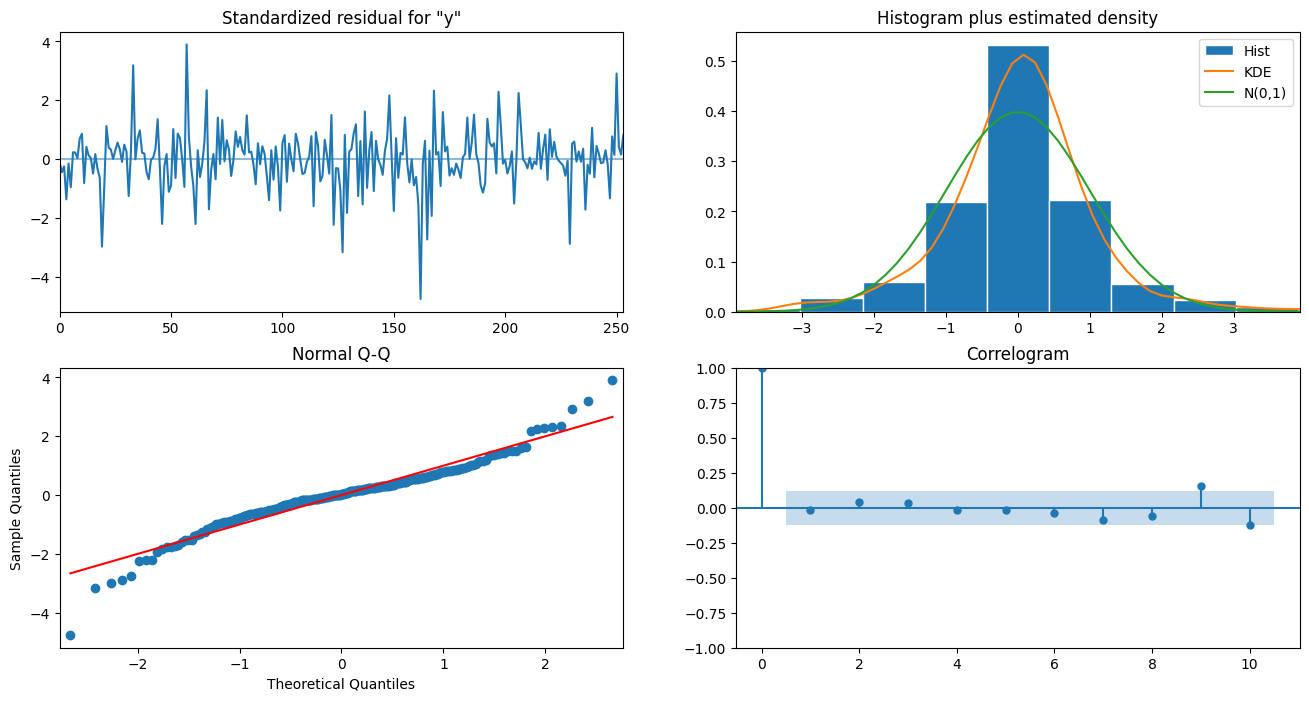

In [38]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [39]:
lagrange_t_stat, p_value, _, _ = acorr_breusch_godfrey(results, nlags=12)
print(f"Results from Breusch-Godfrey Test\nTest-Statistic: {lagrange_t_stat}\nP-Value: {p_value}")

if p_value <= 0.05:
    print(f"Reject the null hypothesis. Presence of serial correlation in the residuals is likely.")
else: 
    print(f"Fail to reject the null hypothesis. Evidence does not suggest serial correlation.")


Results from Breusch-Godfrey Test
Test-Statistic: 15.00182363296182
P-Value: 0.24133673656778618
Fail to reject the null hypothesis. Evidence does not suggest serial correlation.


In [40]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean


In [41]:
mse = mean_squared_error(train, pred_mean)
rmse = sqrt(mse)
print(f"Train RMSE: {rmse}")

Train RMSE: 0.03566497422126423


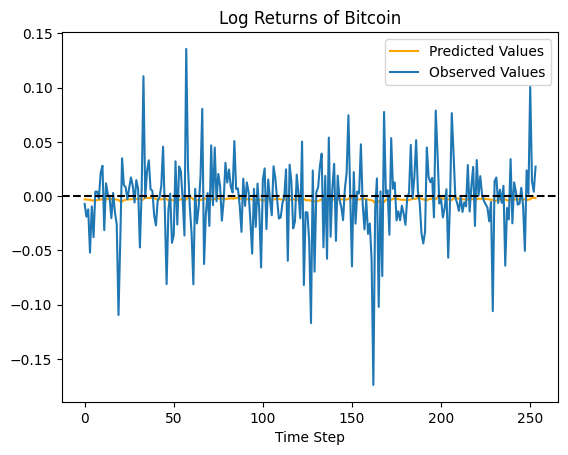

In [42]:
plt.plot(pred_mean, c='orange', label="Predicted Values")
plt.plot(train, label='Observed Values')
plt.axhline(y=0, c="black", linestyle="--")
plt.xlabel('Time Step')
plt.title('Log Returns of Bitcoin')
plt.legend()
plt.show()